In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pl
from scipy.stats import mode
from collections import Counter
import louvain
import seaborn as sns
import scipy.stats


def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)

In [2]:
#如果数据换了(细胞或者基因改变了，这个文件夹要删掉！！！不然会启用之前保存的，不会覆盖！！！)
sc.settings.verbosity = 3
sc.set_figure_params(color_map='viridis')
sc.logging.print_versions()
results_file = 'nestorowa.h5ad'
results_file_denoised = 'nestorowa_denoised.h5ad'

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.8.0
appnope             0.1.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
h5py                3.7.0
igraph              0.9.11
ipykernel           5.3.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
joblib              0.16.0
kiwisolver          1.2.0
llvmlite            0.33.0+1.g022ab0f
louvain             0.7.1
matplotlib          3.5.3
mkl                 2.3.0
mpl_toolkits        NA
natsort             8.1.0
numba               0.50.1
numexpr             2.7.1
numpy               1.18.5
packaging           20.4
pandas              1.0.5
parso               0.7.0
pexpect             4.8.0
pickleshar

In [4]:
T_DF = ReadTable('../T_SCT/IntegImmune_VarGeneData_SCT_subset_T_T.txt')
NK_DF = ReadTable('../NK_SCT/IntegImmune_VarGeneData_SCT_subset_NK_T.txt')
B_DF = ReadTable('../B_SCT/IntegImmune_VarGeneData_SCT_subset_B_T.txt')
Myeloid_DF = ReadTable('../Myeloid_SCT/IntegImmune_VarGeneData_SCT_subset_Myeloid_T.txt')



In [14]:
frames = [T_DF,NK_DF,B_DF,Myeloid_DF]

MergeDF = pd.concat(frames)
MergeDF.head()

,S100A9,GNLY,S100A8,LYZ,PPBP,NKG7,PF4,GP1BB,PTGDS,CCL5,...,AL359397.2,B4GALNT3,BHLHE40-AS1,SRD5A3-AS1,AC109446.3,ZNF221,AC119403.1,GTF2B,AC083973.1,TMPRSS13
AAACCCAAGACTCTTG-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCAAGATAGTCA-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCAAGATGCAGC-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCAAGTGATGGC-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCACAAATGCGG-1_1,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0


In [20]:
MergeDF=MergeDF.drop_duplicates(keep='first')
len(MergeDF)

114643

In [18]:
T_MetaDF = ReadTable('../T_SCT/IntegImmune_MetaData_subset_T_T.txt')
NK_MetaDF = ReadTable('../NK_SCT/IntegImmune_MetaData_subset_NK_T.txt')
B_MetaDF = ReadTable('../B_SCT/IntegImmune_MetaData_subset_B_T.txt')
Myeloid_MetaDF = ReadTable('../Myeloid_SCT/IntegImmune_MetaData_subset_Myeloid_T.txt')

frames = [T_MetaDF,NK_MetaDF,B_MetaDF,Myeloid_MetaDF]

MetaDF = pd.concat(frames)
MetaDF.head()


MetaDF=MetaDF.drop_duplicates(keep='first')



In [19]:
len(MetaDF)

114643

In [21]:
MetaDF.to_csv('./IntegImmune_MetaData_merge.txt',sep='\t')
MergeDF.to_csv('./IntegImmune_MergeDF_merge.txt',sep='\t')


# 1、预处理得到相应细胞的Meta和Count文件

In [22]:
# gene expression （行是细胞，列是基因）
adata = sc.read('./IntegImmune_MergeDF_merge.txt', cache=True)
adata


... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 114643 × 2972

In [29]:
# cell type annotation
BioGroup = pd.read_csv('IntegImmune_MetaData_merge.txt', sep='\t',index_col=0)
celltype1 = pd.read_csv('IntegImmune_MetaData_merge.txt', sep='\t',index_col=0)
BioGroup_cluster = pd.read_csv('IntegImmune_MetaData_merge.txt', sep='\t',index_col=0)
# replace with shorter names
acronyms1 = {'B1': 'B1','B2': 'B2','B3': 'B3','B4': 'B4','B5': 'B5','B6': 'B6','B7': 'B7','B8': 'B8'}
acronyms2 = {'T': 'T','B': 'B','NK':'NK','Myeloid':'Myeloid','proNKT':'proNKT'}
acronyms3 = {'B1_T': 'B1_T','B1_B': 'B1_B','B1_NK': 'B1_NK','B1_Myeloid': 'B1_Myeloid','B1_proNKT': 'B1_proNKT',
             'B2_T': 'B2_T','B2_B': 'B2_B','B2_NK': 'B2_NK','B2_Myeloid': 'B2_Myeloid','B2_proNKT': 'B2_proNKT',
             'B3_T': 'B3_T','B3_B': 'B3_B','B3_NK': 'B3_NK','B3_Myeloid': 'B3_Myeloid','B3_proNKT': 'B3_proNKT',
             'B4_T': 'B4_T','B4_B': 'B4_B','B4_NK': 'B4_NK','B4_Myeloid': 'B4_Myeloid','B4_proNKT': 'B4_proNKT',
             'B5_T': 'B5_T','B5_B': 'B5_B','B5_NK': 'B5_NK','B5_Myeloid': 'B5_Myeloid','B5_proNKT': 'B5_proNKT',
             'B6_T': 'B6_T','B6_B': 'B6_B','B6_NK': 'B6_NK','B6_Myeloid': 'B6_Myeloid','B6_proNKT': 'B6_proNKT',
             'B7_T': 'B7_T','B7_B': 'B7_B','B7_NK': 'B7_NK','B7_Myeloid': 'B7_Myeloid','B7_proNKT': 'B7_proNKT',
             'B8_T': 'B8_T','B8_B': 'B8_B','B8_NK': 'B8_NK','B8_Myeloid': 'B8_Myeloid','B8_proNKT': 'B8_proNKT'}
# add this cell type information
BioGroup = [acronyms1[BioGroup.loc[cell_id, 'BioGroup']]
              if cell_id in BioGroup.index else 'no_gate' for cell_id in adata.obs_names]

celltype1 = [acronyms2[celltype1.loc[cell_id, 'celltype3']]
              if cell_id in celltype1.index else 'no_gate' for cell_id in adata.obs_names]

BioGroup_cluster = [acronyms3[BioGroup_cluster.loc[cell_id, 'BioGroup_cluster2']]
              if cell_id in BioGroup_cluster.index else 'no_gate' for cell_id in adata.obs_names]
#color_types = [acronyms3[color_types.loc[cell_id, 'color']]
              #if cell_id in color_types.index else 'no_gate' for cell_id in adata.obs_names]
adata.obs['BioGroup'] = BioGroup
adata.obs['celltype1'] = celltype1
adata.obs['BioGroup_cluster'] = BioGroup_cluster


In [30]:
adata

AnnData object with n_obs × n_vars = 114643 × 2972
    obs: 'BioGroup', 'celltype1', 'BioGroup_cluster'

# PAGA

In [31]:
adata.raw = adata
#sc.pp.recipe_weinreb17(adata, log=False)
sc.tl.pca(adata)

computing PCA
    with n_comps=50
    finished (0:00:14)


computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:15:13)


... storing 'BioGroup' as categorical
... storing 'celltype1' as categorical
... storing 'BioGroup_cluster' as categorical


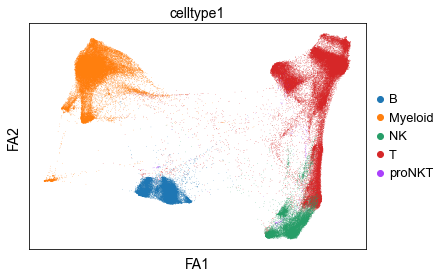

In [32]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=25)
sc.tl.draw_graph(adata, layout='fa', random_state=3)
sc.pl.draw_graph(adata, color='celltype1', layout='fa')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


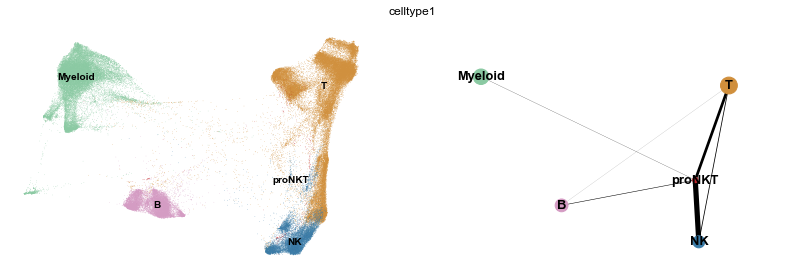

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

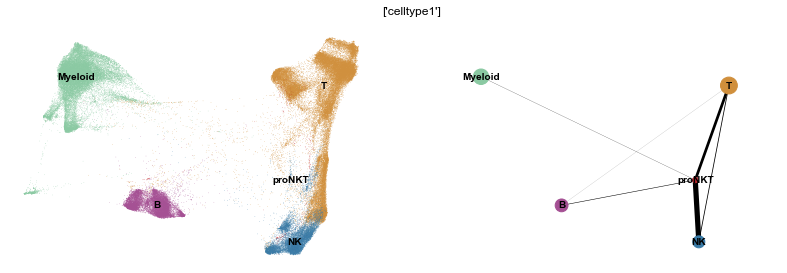

In [41]:
sc.tl.paga(adata, groups='celltype1')
sc.pl.paga_compare(adata, basis='X_draw_graph_fa')
from matplotlib import rcParams
import matplotlib.pyplot as plt
fig = plt.figure()
sc.pl.paga_compare(adata, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data',fontsize=10, fontweight='light'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_All_celltype1.pdf')

pl.show()

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


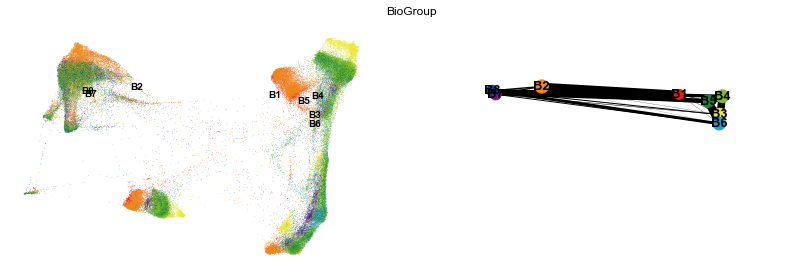

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

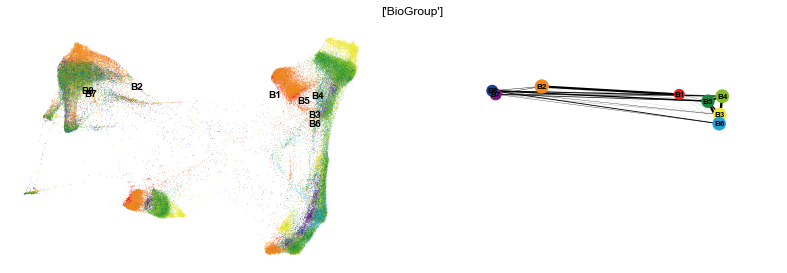

In [43]:
sc.tl.paga(adata, groups='BioGroup')
sc.pl.paga_compare(adata, basis='X_draw_graph_fa')
from matplotlib import rcParams
import matplotlib.pyplot as plt
fig = plt.figure()
sc.pl.paga_compare(adata, basis='X_draw_graph_fa', color=['BioGroup'],edge_width_scale=0.3, legend_loc='on data', fontsize=8, fontweight='light'
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_All_BioGroup.pdf')

pl.show()

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:07)
--> added 'pos', the PAGA positions (adata.uns['paga'])


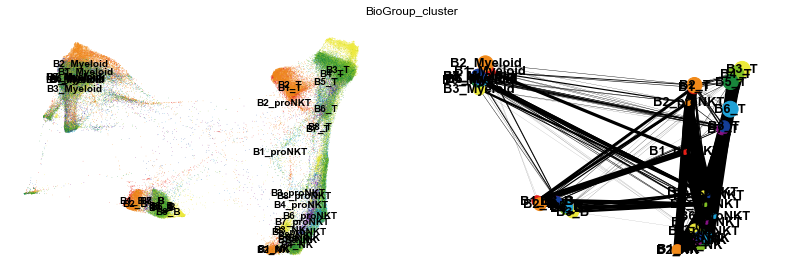

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

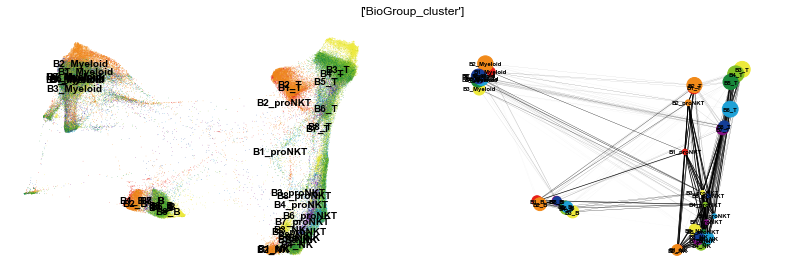

In [46]:
sc.tl.paga(adata, groups='BioGroup_cluster')
sc.pl.paga_compare(adata, basis='X_draw_graph_fa')
from matplotlib import rcParams
import matplotlib.pyplot as plt
fig = plt.figure()
sc.pl.paga_compare(adata, basis='X_draw_graph_fa', color=['BioGroup_cluster'], edge_width_scale=0.1,legend_loc='on data',fontsize=6, fontweight='light'
                        ,palette=("#E71F17","#E71F17","#E71F17","#E71F17","#E71F17",
                                  "#F18A1A","#F18A1A","#F18A1A","#F18A1A","#F18A1A",
                                  "#EDE93B","#EDE93B","#EDE93B","#EDE93B","#EDE93B",
                                  "#81BF25","#81BF25","#81BF25","#81BF25","#81BF25",
                                  "#19873B","#19873B", "#19873B", "#19873B", "#19873B", 
                                  "#1FA1D6","#1FA1D6","#1FA1D6","#1FA1D6","#1FA1D6",
                                  "#831182","#831182","#831182","#831182","#831182",
                                  "#143E97","#143E97","#143E97","#143E97","#143E97")
                        ,save='PAGA_All_BioGroup_cluster.pdf')

pl.show()

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:07)
--> added 'pos', the PAGA positions (adata.uns['paga'])


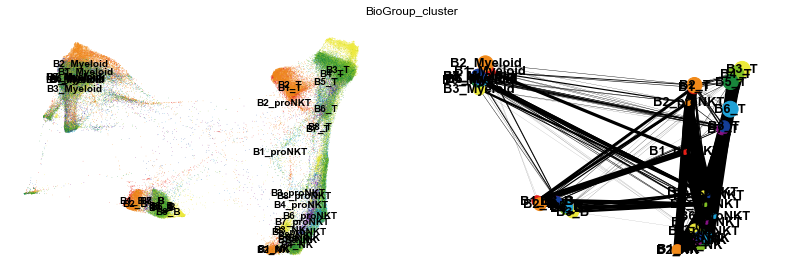

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

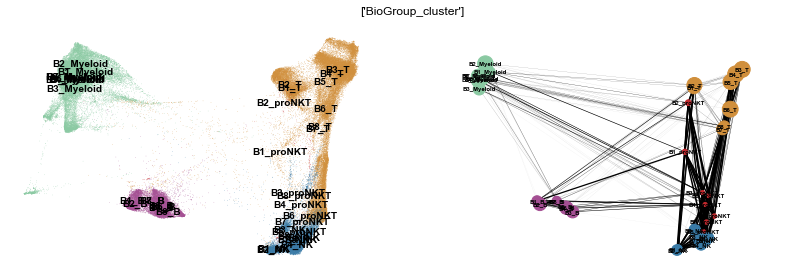

In [47]:
sc.tl.paga(adata, groups='BioGroup_cluster')
sc.pl.paga_compare(adata, basis='X_draw_graph_fa')
from matplotlib import rcParams
import matplotlib.pyplot as plt
fig = plt.figure()
sc.pl.paga_compare(adata, basis='X_draw_graph_fa', color=['BioGroup_cluster'],edge_width_scale=0.2, legend_loc='on data',fontsize=6, fontweight='light'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E'
                                 ,"#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_All_BioGroup_cluster_v2.pdf')

pl.show()

# way1: 按细胞类型划分

In [56]:
adata_T=adata[adata.obs['celltype1']=='T',:]
adata_B=adata[adata.obs['celltype1']=='B',:]
adata_NK=adata[adata.obs['celltype1']=='NK',:]
adata_M=adata[adata.obs['celltype1']=='Myeloid',:]
adata_proNKT=adata[adata.obs['celltype1']=='proNKT',:]


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


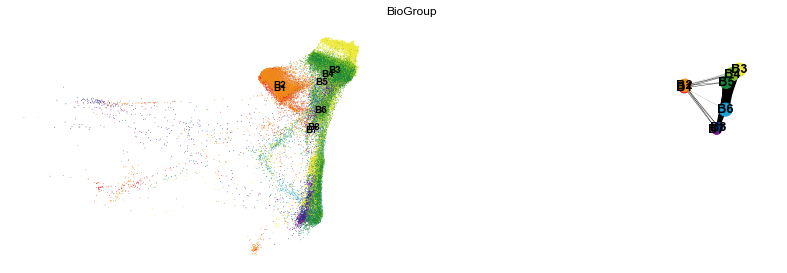

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

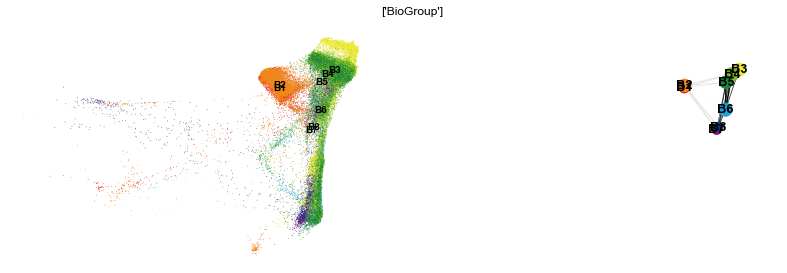

In [50]:
sc.tl.paga(adata_T, groups='BioGroup')
sc.pl.paga_compare(adata_T, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_T, basis='X_draw_graph_fa', color=['BioGroup'], legend_loc='on data',edge_width_scale=0.2
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_T_BioGroup.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


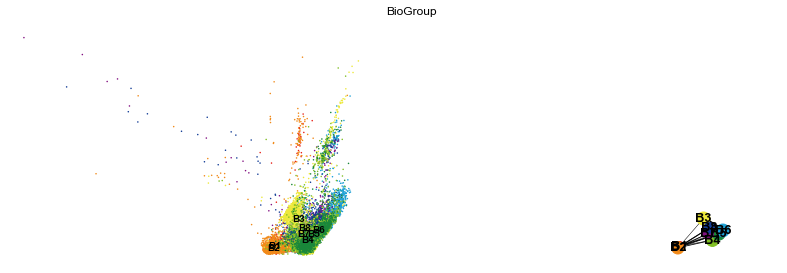

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

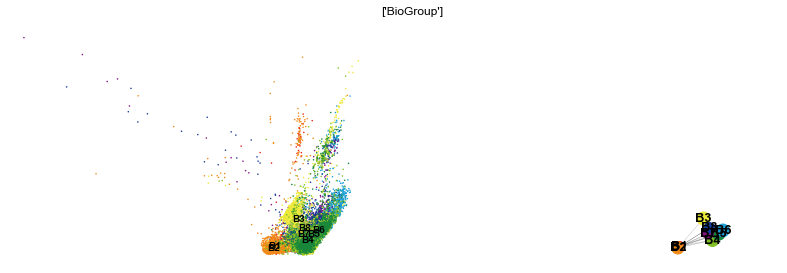

In [51]:
sc.tl.paga(adata_NK, groups='BioGroup')
sc.pl.paga_compare(adata_NK, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_NK, basis='X_draw_graph_fa', color=['BioGroup'], legend_loc='on data',edge_width_scale=0.2
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_NK_BioGroup.pdf')
pl.show()



running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


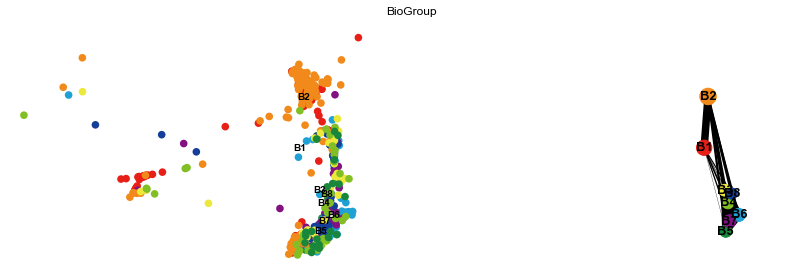

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

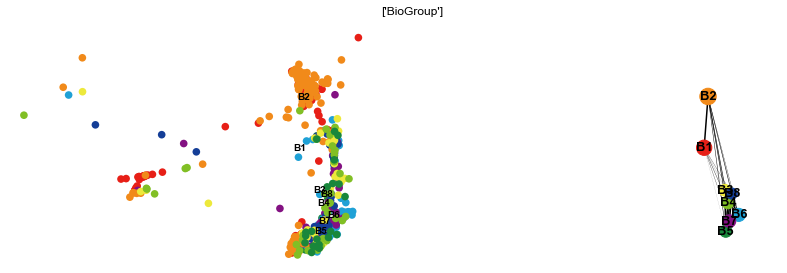

In [53]:
sc.tl.paga(adata_proNKT, groups='BioGroup')
sc.pl.paga_compare(adata_proNKT, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_proNKT, basis='X_draw_graph_fa', color=['BioGroup'], legend_loc='on data',edge_width_scale=0.2
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_proNKT_BioGroup.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


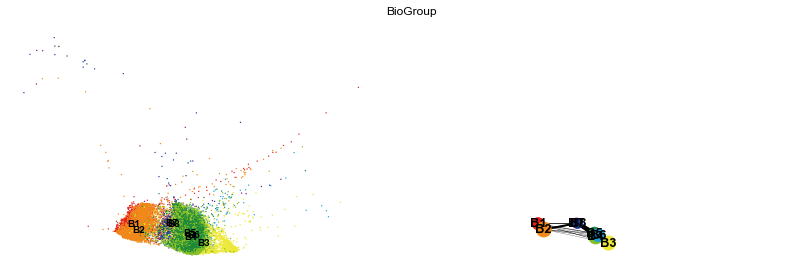

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

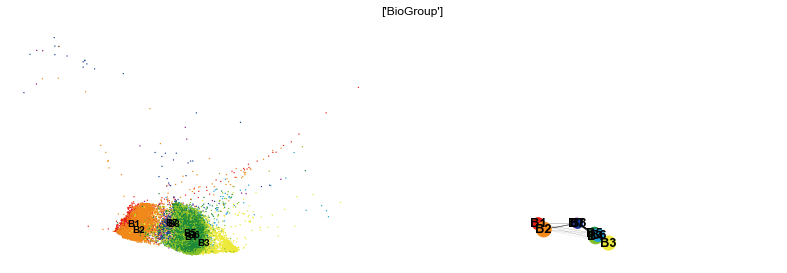

In [54]:
sc.tl.paga(adata_B, groups='BioGroup')
sc.pl.paga_compare(adata_B, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B, basis='X_draw_graph_fa', color=['BioGroup'], legend_loc='on data',edge_width_scale=0.2
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_B_BioGroup.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


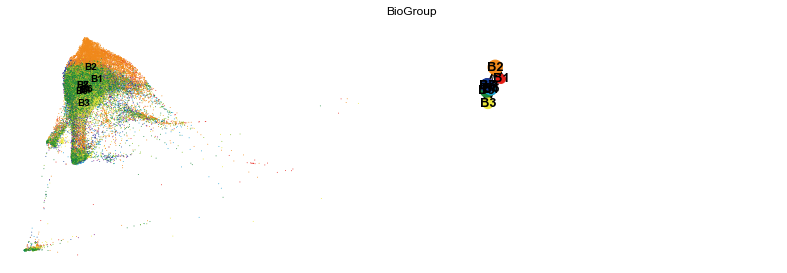

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

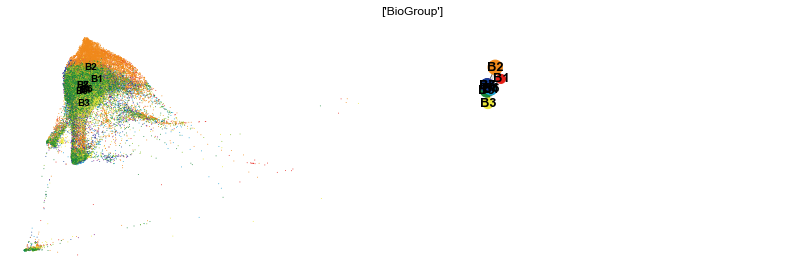

In [57]:
sc.tl.paga(adata_M, groups='BioGroup')
sc.pl.paga_compare(adata_M, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_M, basis='X_draw_graph_fa', color=['BioGroup'], legend_loc='on data',edge_width_scale=0.2
                        ,palette=("#E71F17", "#F18A1A","#EDE93B", "#81BF25","#19873B", "#1FA1D6","#831182","#143E97")
                        ,save='PAGA_M_BioGroup.pdf')
pl.show()



# way2: 按时期划分

In [58]:
adata_B1=adata[adata.obs['BioGroup']=='B1',:]
adata_B2=adata[adata.obs['BioGroup']=='B2',:]
adata_B3=adata[adata.obs['BioGroup']=='B3',:]
adata_B4=adata[adata.obs['BioGroup']=='B4',:]
adata_B5=adata[adata.obs['BioGroup']=='B5',:]
adata_B6=adata[adata.obs['BioGroup']=='B6',:]
adata_B7=adata[adata.obs['BioGroup']=='B7',:]
adata_B8=adata[adata.obs['BioGroup']=='B8',:]


running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


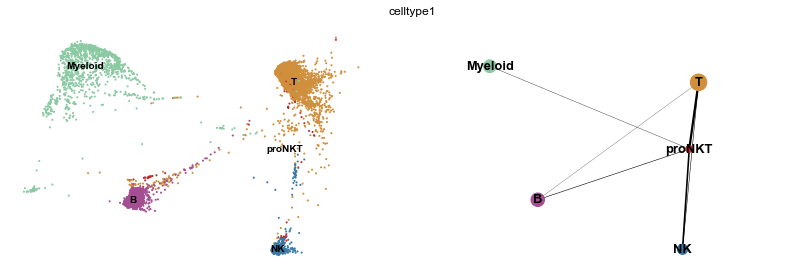

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

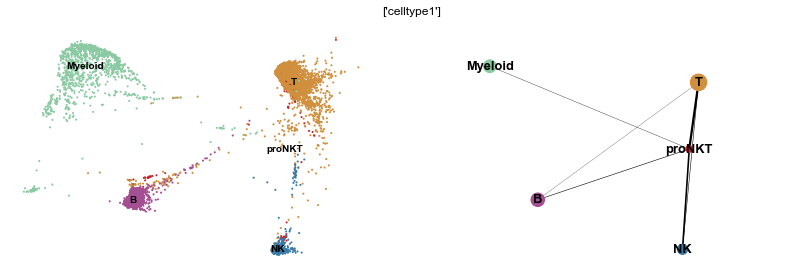

In [59]:
sc.tl.paga(adata_B1, groups='celltype1')
sc.pl.paga_compare(adata_B1, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B1, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B1_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


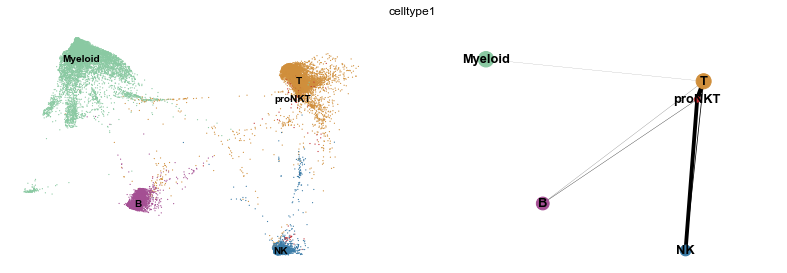

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

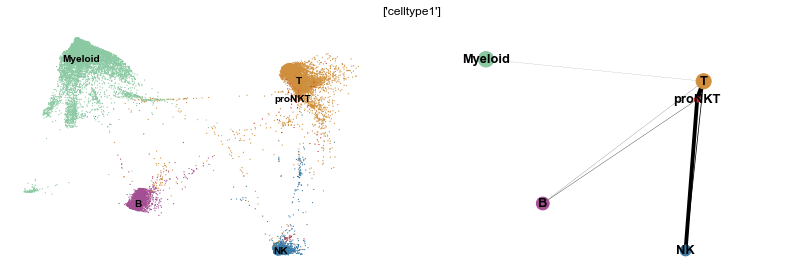

In [60]:
sc.tl.paga(adata_B2, groups='celltype1')
sc.pl.paga_compare(adata_B2, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B2, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B2_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


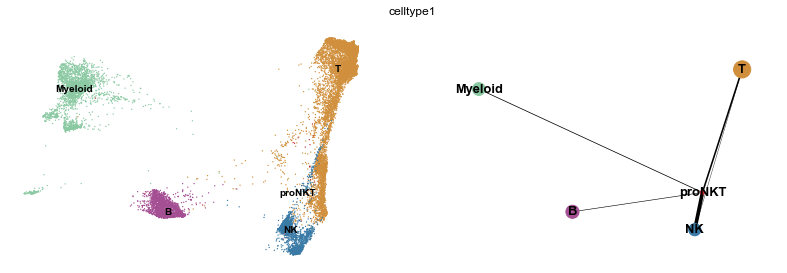

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

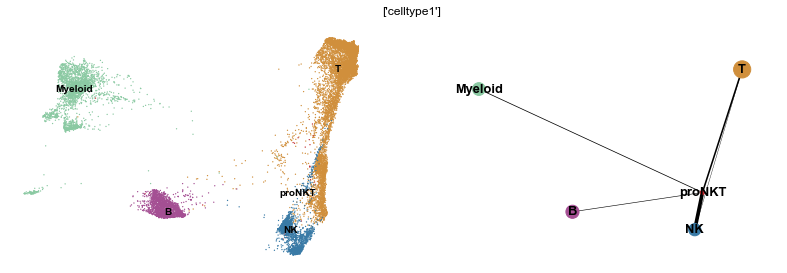

In [61]:
sc.tl.paga(adata_B3, groups='celltype1')
sc.pl.paga_compare(adata_B3, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B3, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B3_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


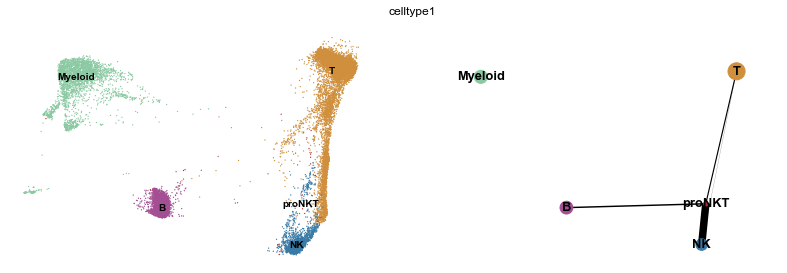

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

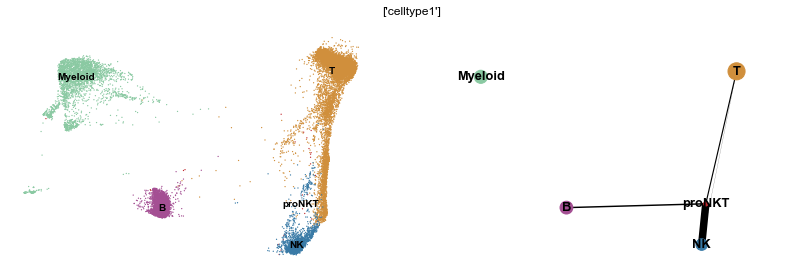

In [62]:
sc.tl.paga(adata_B4, groups='celltype1')
sc.pl.paga_compare(adata_B4, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B4, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B4_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


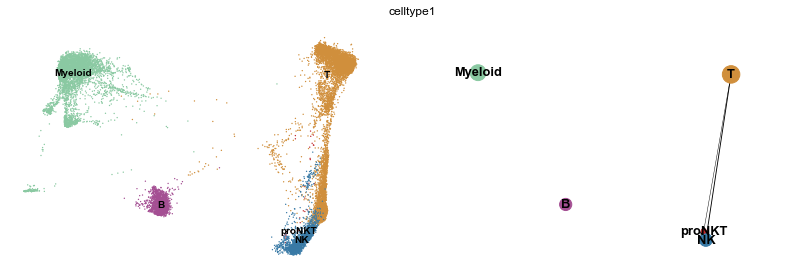

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

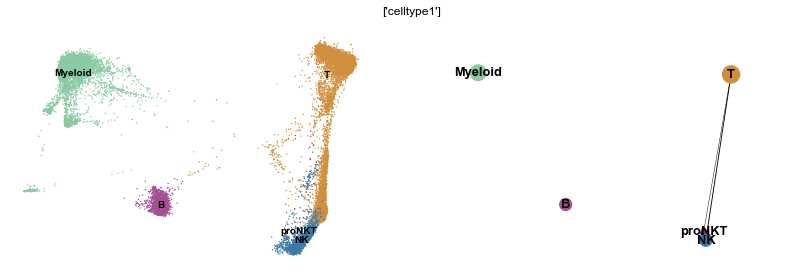

In [63]:
sc.tl.paga(adata_B5, groups='celltype1')
sc.pl.paga_compare(adata_B5, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B5, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B5_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


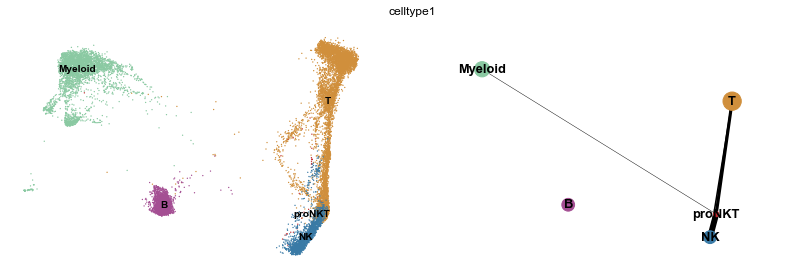

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

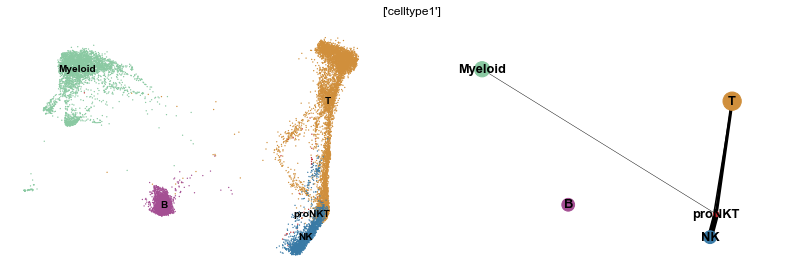

In [64]:
sc.tl.paga(adata_B6, groups='celltype1')
sc.pl.paga_compare(adata_B6, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B6, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B6_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


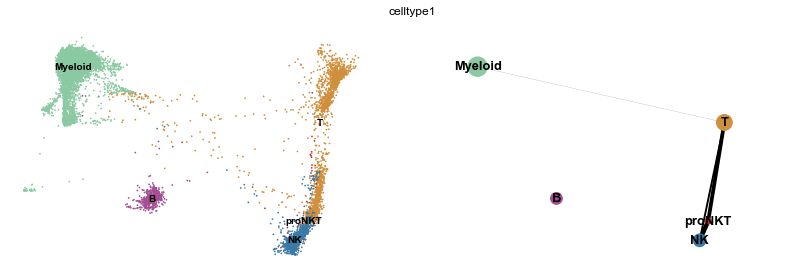

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

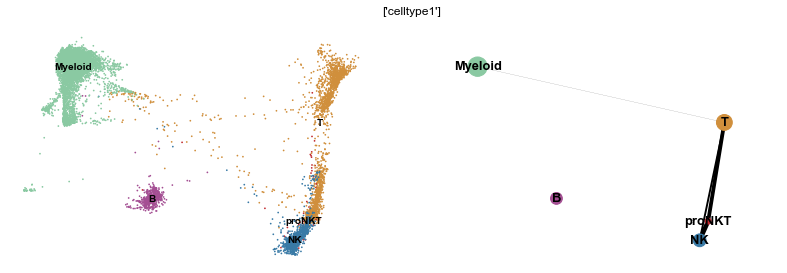

In [65]:
sc.tl.paga(adata_B7, groups='celltype1')
sc.pl.paga_compare(adata_B7, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B7, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B7_celltype1.pdf')
pl.show()



running PAGA


Trying to set attribute `._uns` of view, copying.


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


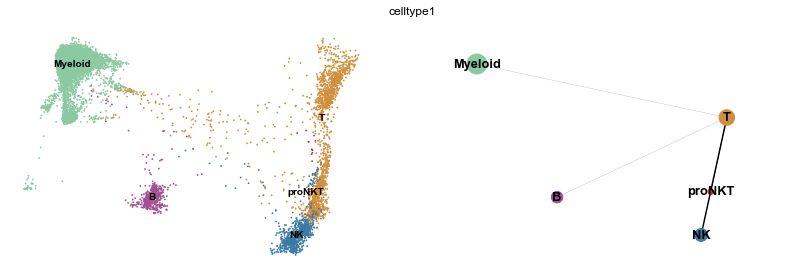

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Figure size 432x288 with 0 Axes>

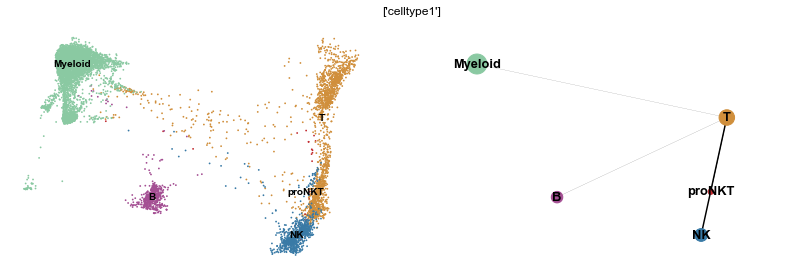

In [66]:
sc.tl.paga(adata_B8, groups='celltype1')
sc.pl.paga_compare(adata_B8, basis='X_draw_graph_fa')
fig = plt.figure()
sc.pl.paga_compare(adata_B8, basis='X_draw_graph_fa', color=['celltype1'], legend_loc='on data'
                        ,palette=("#A44F93","#8AC9A2","#397AA6","#D08F3C",'#C1292E')
                        ,save='PAGA_B8_celltype1.pdf')
pl.show()

